# Credit Card Default Prediction

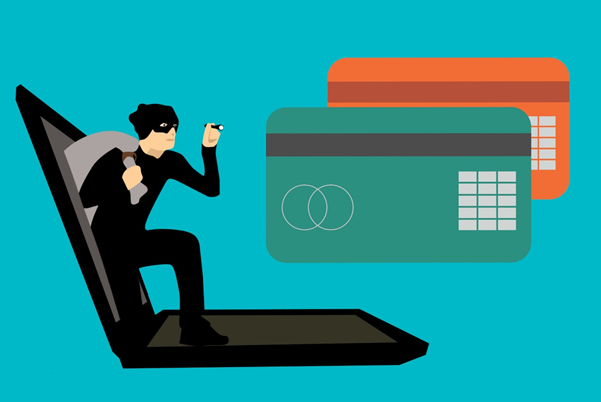

In [1]:
from IPython.display import Image
Image("1_xSqK9iS7nZAaB-Sdwiwjow.png")

## 1. Introduction:

**American Express** operates in the financial services industry, specifically in the credit card and payments industry. It is a leading global provider of payment solutions and financial services for consumers, businesses, and merchants. 

AmEx offers a range of financial products and services, including credit cards, charge cards, travel services, merchant services, and personal savings products. Its core business is its proprietary card products, which include consumer, small business, and corporate cards.

Despite having a world-class infrastructure and a strong reputation for customer service, **AmEx is facing the challenge of customers getting defaulted. This means that some customers are not able to repay their credit card debts on time, resulting in financial losses for AmEx.** Defaulted customers are also at risk of losing their credit score, which can make it more difficult for them to obtain credit in the future.

**AmEx is aware that they have a vast amount of customer data that could potentially be used to address this challenge. However, they have not been able to make effective use of this data to create measurable economic benefits, such as increased revenue or reduced expenses. Therefore, AmEx has reached out to Global Waterhouse Consulting to develop a roadmap for generating insights from data to help reduce the risk of customer defaults and increase revenue.**

## 2. Work Flow:

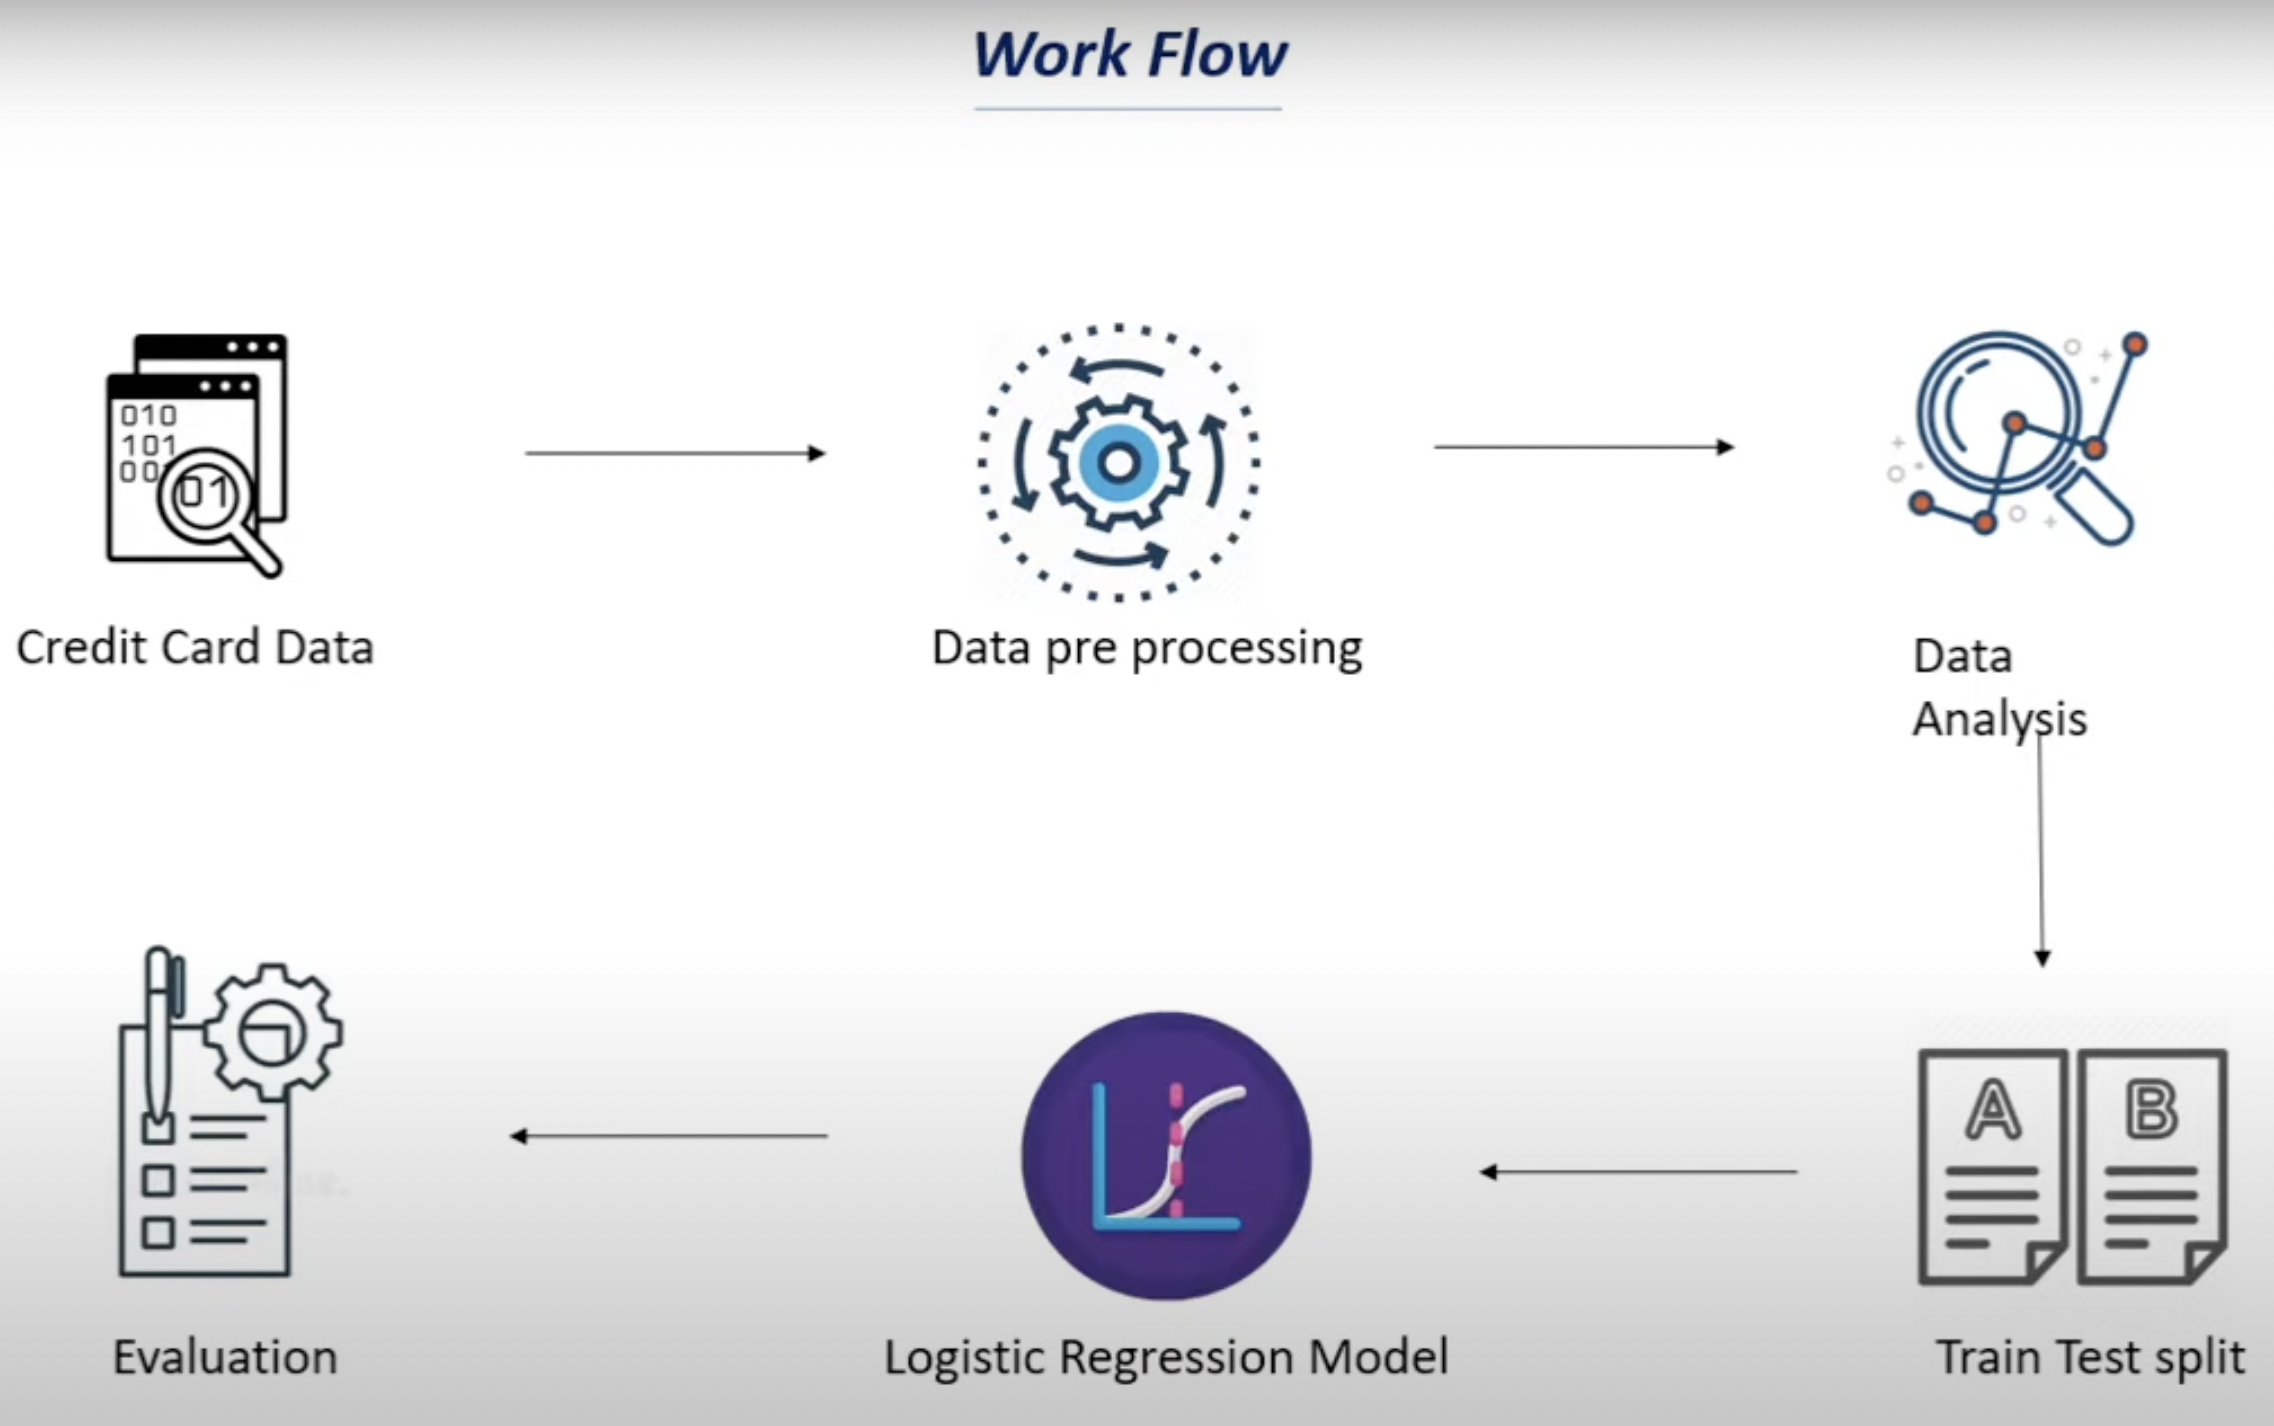

In [2]:
Image("Screenshot 2022-09-09 at 4.40.55 PM.png")

## 3. Import Libraries:

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

## 4. Load the Dataset:

In [4]:
df = pd.read_csv('DataSights_Dataset.csv')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
customer_id,CST_115179,CST_121920,CST_109330,CST_128288,CST_151355,CST_123268,CST_127502,CST_151722,CST_133768,CST_111670
name,ita Bose,Alper Jonathan,Umesh Desai,Rie,McCool,Sarah Marsh,Mason,Saba,Ashutosh,David Milliken
age,46,29,37,39,46,46,38,46,40,39
gender,F,M,M,F,M,F,M,F,F,F
owns_car,N,N,N,N,Y,Y,N,Y,NaN,Y
owns_house,Y,Y,Y,Y,Y,N,Y,Y,Y,Y
no_of_children,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
net_yearly_income,107934.04,109862.62,230153.17,122325.82,387286.0,252765.91,262389.2,241211.39,210091.43,207109.13
no_of_days_employed,612.0,2771.0,204.0,11941.0,1459.0,2898.0,5541.0,1448.0,11551.0,2791.0
occupation_type,Unknown,Laborers,Laborers,Core staff,Core staff,Accountants,High skill tech staff,Core staff,Laborers,High skill tech staff


## 5. Check the Data:

In [5]:
df.shape

(45528, 19)

### 5.1. Glimpse of the Dataset

In [6]:
df.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [8]:
df.nunique()

customer_id                45528
name                        4010
age                           33
gender                         3
owns_car                       2
owns_house                     2
no_of_children                10
net_yearly_income          45502
no_of_days_employed         7874
occupation_type               19
total_family_members          10
migrant_worker                 2
yearly_debt_payments       45251
credit_limit               45371
credit_limit_used(%)         100
credit_score                 450
prev_defaults                  3
default_in_last_6months        2
credit_card_default            2
dtype: int64

### 5.2. Check Missing Values

In [9]:
df.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

### 5.3. Check Data Unbalance

In [10]:
df.credit_card_default.value_counts(normalize=True)*100

0    91.879722
1     8.120278
Name: credit_card_default, dtype: float64

In [11]:
# get all categorical features
cols = df.columns 

for i in cols:
    if len(df[i].value_counts())<=20:
        print("Column Name:",i)
        print(df[i].value_counts())
        print("*"*50)

Column Name: gender
F      29957
M      15570
XNA        1
Name: gender, dtype: int64
**************************************************
Column Name: owns_car
N    29743
Y    15238
Name: owns_car, dtype: int64
**************************************************
Column Name: owns_house
Y    31642
N    13886
Name: owns_house, dtype: int64
**************************************************
Column Name: no_of_children
0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
8.0        1
9.0        1
Name: no_of_children, dtype: int64
**************************************************
Column Name: occupation_type
Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              9

As there are missing values mostly less than 2%, so, let us impute all missing values with statistical way.

That is, FillNA by MODE if it is categorical variable and FillNA by MEDIAN if it is numerical variable.

In [12]:
df.isna().sum().sort_values(ascending=False).head(10)

no_of_children             774
owns_car                   547
no_of_days_employed        463
yearly_debt_payments        95
migrant_worker              87
total_family_members        83
credit_score                 8
customer_id                  0
default_in_last_6months      0
prev_defaults                0
dtype: int64

In [13]:
df['gender'] = df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df['gender'].value_counts()

F    29957
M    15571
Name: gender, dtype: int64

In [14]:
# fill no_of_children with mode of the data
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)

In [15]:
# fill owns_car with mode of the data
df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)

In [16]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
occp_days_employed = df.groupby(by='occupation_type')['no_of_days_employed'].median()
occp_days_employed

occupation_type
Accountants                1822.0
Cleaning staff             1509.0
Cooking staff              1429.5
Core staff                 1883.0
Drivers                    1342.0
HR staff                   1528.0
High skill tech staff      1728.0
IT staff                   1747.0
Laborers                   1687.0
Low-skill Laborers          983.0
Managers                   2118.0
Medicine staff             2826.0
Private service staff      1718.0
Realty agents              1390.0
Sales staff                1276.0
Secretaries                2001.5
Security staff             1419.0
Unknown                  365241.0
Waiters/barmen staff       1258.0
Name: no_of_days_employed, dtype: float64

In [17]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
for i in occp_days_employed.index:
    df['no_of_days_employed'] = np.where((df['no_of_days_employed'].isna()) & (df['occupation_type'] == i), 
                                         occp_days_employed[i], df['no_of_days_employed'])

In [18]:
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
yearDebt_credit = df.groupby(by='credit_card_default')['yearly_debt_payments'].median()
yearDebt_credit

credit_card_default
0    29076.84
1    29133.40
Name: yearly_debt_payments, dtype: float64

In [19]:
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
for i in yearDebt_credit.index:   
    df['yearly_debt_payments'] = np.where((df['yearly_debt_payments'].isna()) & (df['credit_card_default'] == i), 
                                          yearDebt_credit[i], df['yearly_debt_payments'])

In [20]:
# imputing with mode of the data
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)

# imputing with mode of the data
df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)

In [21]:
# check medians of credit_score wrt credit_card_default
cred_score = df.groupby(by='credit_card_default')['credit_score'].median()
cred_score

credit_card_default
0    799.0
1    599.0
Name: credit_score, dtype: float64

In [22]:
# impute 'credit_score' with median based on 'credit_card_default'
for i in cred_score.index:  
    df['credit_score'] = np.where((df['credit_score'].isna()) & (df['credit_card_default'] == i), 
                                  cred_score[i], df['credit_score'])

In [23]:
df.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

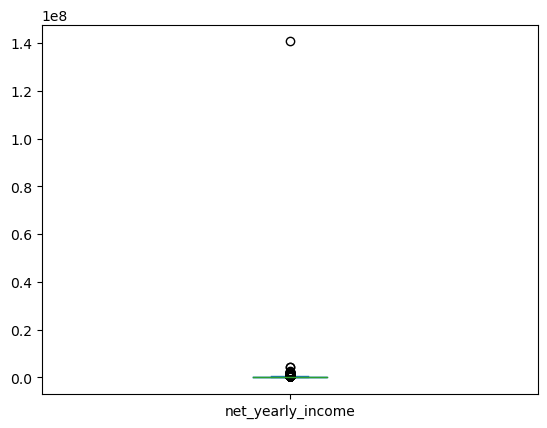

In [24]:
# Lets create bins for net_yearly_income
# boxplot of net_yearly_income

df.net_yearly_income.plot.box()
plt.show()

In [25]:
df.net_yearly_income.quantile([0.25, 0.5, 0.75, 0.99, 1.00])

0.25    1.263458e+05
0.50    1.717149e+05
0.75    2.406038e+05
0.99    5.779015e+05
1.00    1.407590e+08
Name: net_yearly_income, dtype: float64

In [26]:
df[df.net_yearly_income > df.net_yearly_income.quantile(0.99)]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
15,CST_106781,Lesley Wroughton,37,F,N,N,0.0,746959.12,2229.0,Unknown,2.0,0.0,16834.71,188438.82,63,666.0,0,0,0
150,CST_144508,Kevin,43,M,N,Y,0.0,610226.68,3251.0,Managers,2.0,0.0,48463.33,148288.36,78,823.0,0,0,0
237,CST_134049,Alison,34,M,Y,Y,0.0,649425.86,505.0,Managers,2.0,0.0,57770.89,73137.97,44,871.0,0,0,0
335,CST_117197,Alison Griswold,37,M,Y,Y,0.0,879553.84,2279.0,Managers,1.0,0.0,52839.41,194618.06,74,503.0,1,0,1
347,CST_130343,John,33,M,N,Y,3.0,600445.87,2110.0,Managers,5.0,1.0,29076.84,148313.03,40,774.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45158,CST_147033,Kihara,33,M,Y,N,2.0,984019.98,2488.0,Unknown,4.0,1.0,72571.25,315461.88,29,789.0,0,0,0
45233,CST_116873,Alexei Oreskovic,43,M,Y,Y,0.0,694994.90,5564.0,Managers,2.0,0.0,21687.67,113084.03,39,846.0,0,0,0
45296,CST_131492,Sarah,42,F,N,Y,2.0,822367.44,318.0,High skill tech staff,4.0,0.0,97654.32,283544.16,38,697.0,0,0,0
45365,CST_111037,asil Katz,32,F,Y,N,0.0,866722.07,7194.0,Managers,2.0,0.0,62775.26,189329.45,11,803.0,0,0,0


In [27]:
# Lets drop the data above 99%ile 
df = df[df.net_yearly_income <= df.net_yearly_income.quantile(0.99)]
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


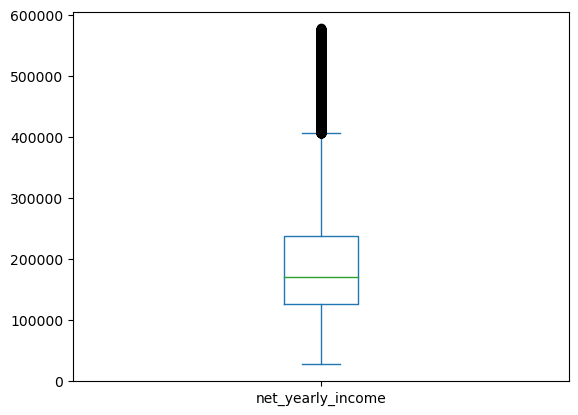

In [28]:
df.net_yearly_income.plot.box()
plt.show()

In [29]:
df.net_yearly_income.quantile([0.25, 0.5, 0.75, 0.99, 1.00])

0.25    125824.5050
0.50    170968.0300
0.75    237768.9200
0.99    494553.0015
1.00    577850.1200
Name: net_yearly_income, dtype: float64

In [30]:
# binning of net_yearly_income into categories
def income_binning(x):
    if x <= 125824.5050:
        return 'Low'
    elif x > 125824.5050 and x <= 170968.0300:
        return 'Below Avg'
    elif x > 170968.0300 and x <= 237768.9200:
        return 'Above Avg'
    else:
        return 'High'

In [31]:
df['income_categories'] = df.net_yearly_income.apply(income_binning)
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,income_categories
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,Low
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,Low
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,Above Avg
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,Low
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,High


## 6. Exploratory Data Analysis:

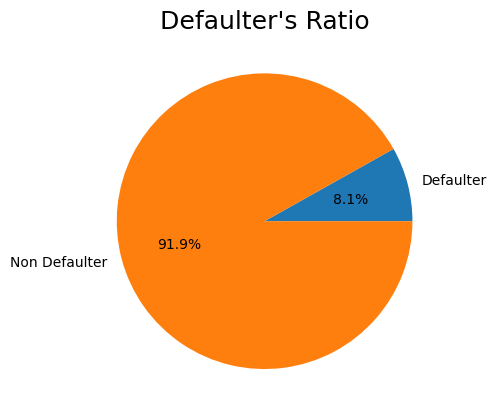

In [32]:
# Ploting Credit_default ratio
total_default_values = df.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Non Defaulter'], autopct='%1.1f%%')
plt.title("Defaulter's Ratio", fontsize=18)
plt.show()

default_in_last_6months    0.776888
prev_defaults              0.772316
credit_score               0.543283
credit_limit_used(%)       0.326589
no_of_days_employed        0.047934
migrant_worker             0.034210
no_of_children             0.023741
net_yearly_income          0.023695
credit_limit               0.014935
total_family_members       0.011110
yearly_debt_payments       0.009972
age                        0.001179
Name: credit_card_default, dtype: float64


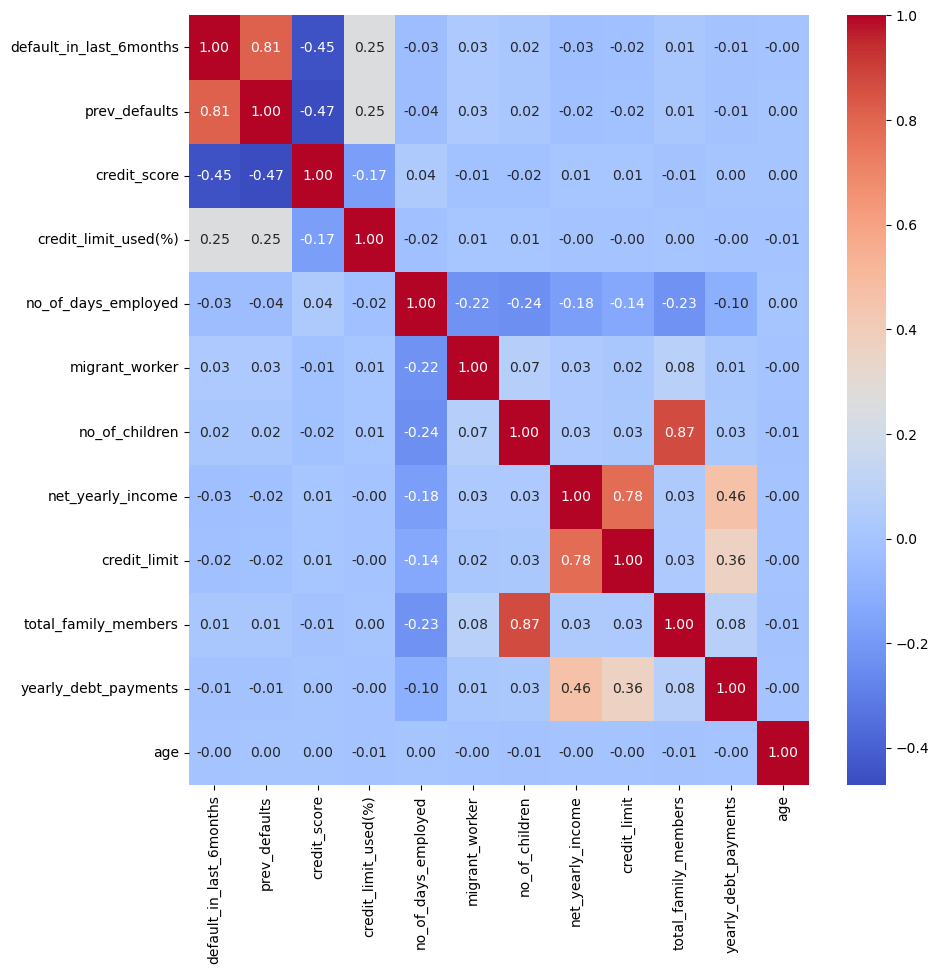

In [33]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Extract the correlations with the target variable
corr_with_target = corr_matrix['credit_card_default'].drop('credit_card_default')

# Sort the correlations in descending order
corr_with_target_sorted = corr_with_target.abs().sort_values(ascending=False)

# Print the correlations in descending order
print(corr_with_target_sorted)

# Generate a heatmap of the correlation matrix with respect to the target variable
plt.figure(figsize=[10,10])
sns.heatmap(corr_matrix.loc[corr_with_target_sorted.index, corr_with_target_sorted.index],
            annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

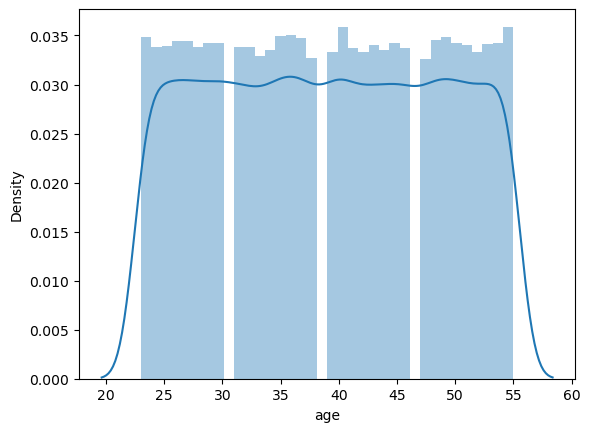

In [34]:
# visualize AGE feature - distplot
plt.figure()
sns.distplot(df['age'])
plt.show()

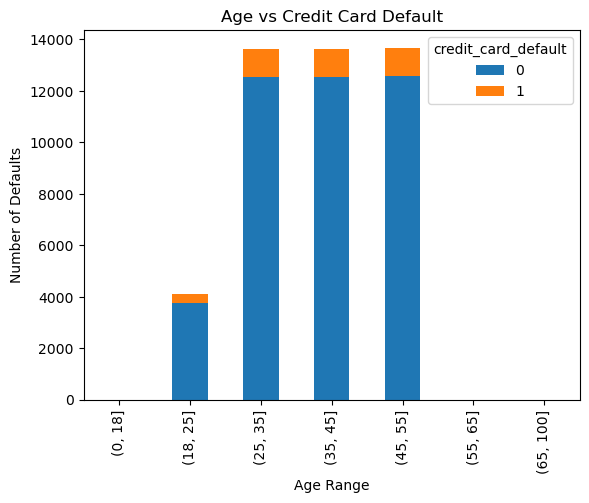

In [35]:
# Create a pivot table to count the number of defaults for each age range
age_ranges = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 65, 100])
default_counts = df.groupby([age_ranges, 'credit_card_default'])['credit_card_default'].count().unstack()

# Plot the bar chart
default_counts.plot(kind='bar', stacked=True)

# Add labels and title to the bar chart
plt.xlabel('Age Range')
plt.ylabel('Number of Defaults')
plt.title('Age vs Credit Card Default')

# Show the bar chart
plt.show()

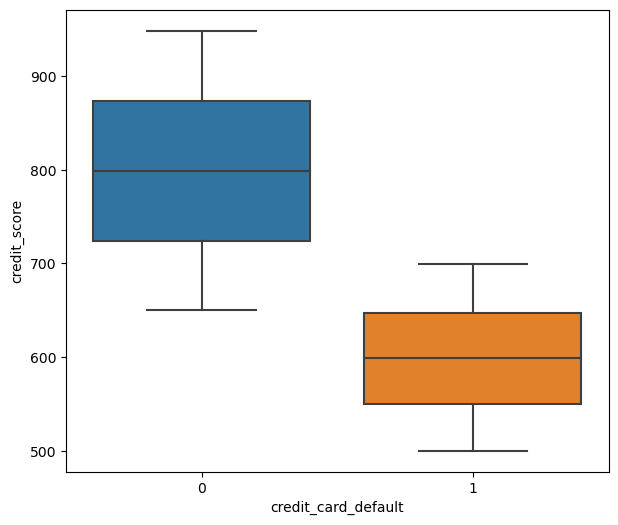

In [36]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7,6])
sns.boxplot(df['credit_card_default'], df['credit_score'])
plt.show()

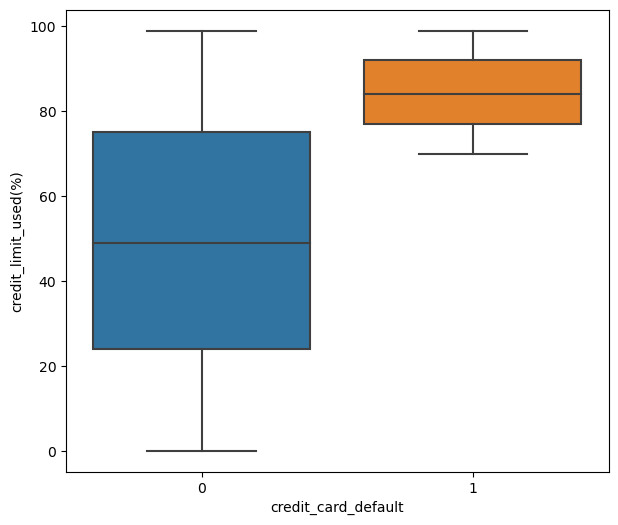

In [37]:
# boxplot of credit_defaulter-credit_limit_utilization
plt.figure(figsize=[7,6])
sns.boxplot(df['credit_card_default'], df['credit_limit_used(%)'])
plt.show()

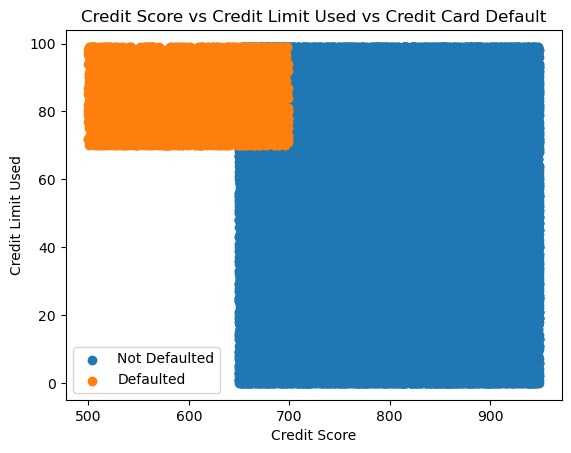

In [38]:
# Extract Credit Score and Credit Limit Used data from the credit_data dataset
credit_score = df['credit_score']
credit_limit_used = df['credit_limit_used(%)']
credit_card_default = df['credit_card_default']

# Create the scatter plot
plt.scatter(credit_score[credit_card_default == 0], credit_limit_used[credit_card_default == 0], label='Not Defaulted')
plt.scatter(credit_score[credit_card_default == 1], credit_limit_used[credit_card_default == 1], label='Defaulted')

# Add labels and title to the scatter plot
plt.xlabel('Credit Score')
plt.ylabel('Credit Limit Used')
plt.title('Credit Score vs Credit Limit Used vs Credit Card Default')

# Add legend to the scatter plot
plt.legend()

# Show the scatter plot
plt.show()

**Individuals who default on their credit payments typically have lower credit scores and have utilized 80-100% of their available credit limits.**

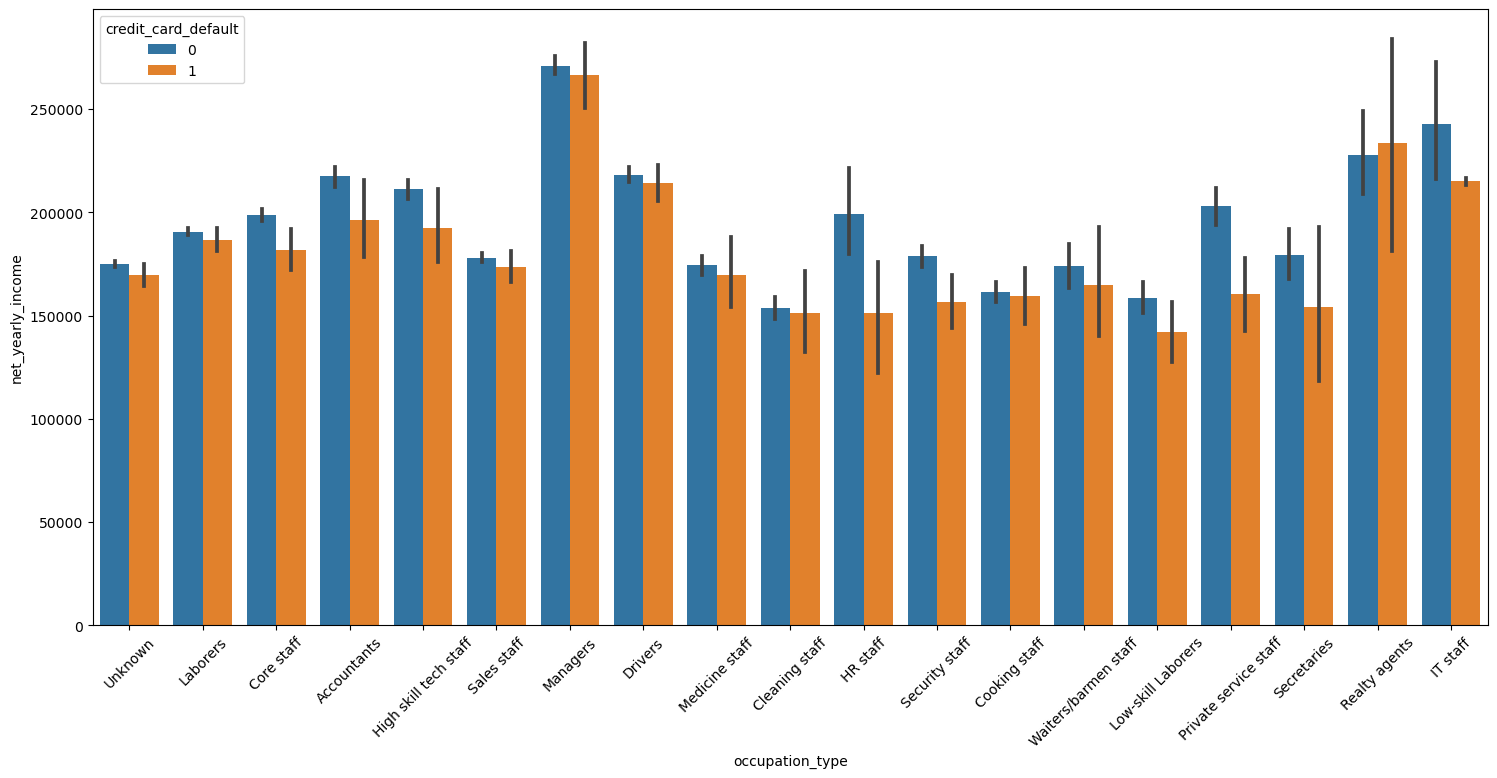

In [39]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

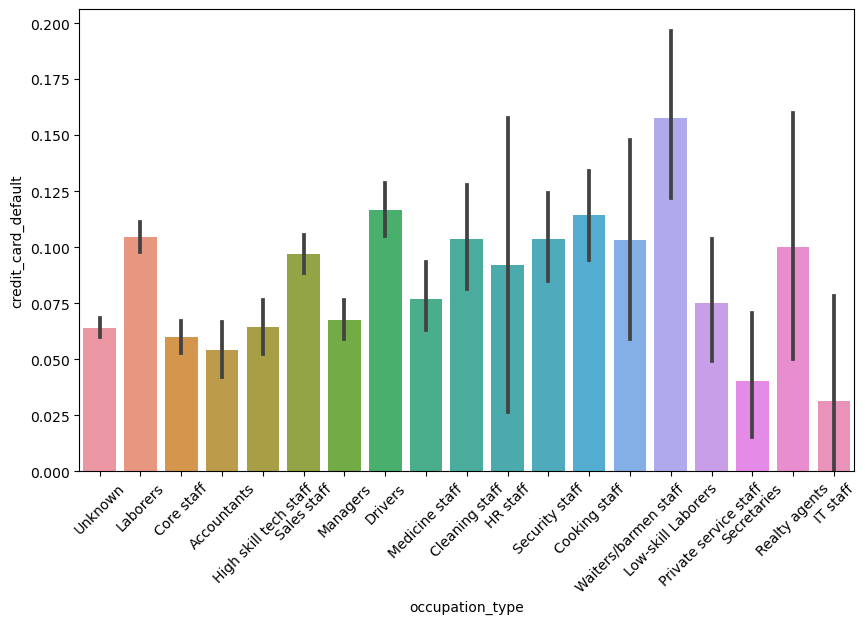

In [40]:
# Create a bar plot of credit card default by occupation type
plt.figure(figsize=[10,6])
sns.barplot(x='occupation_type', y='credit_card_default', data=df)
plt.xticks(rotation=45)
plt.show()

**The majority of defaulters belong to the occupation types of laborers, drivers, and waiters/barmen, who typically earn lower incomes.**

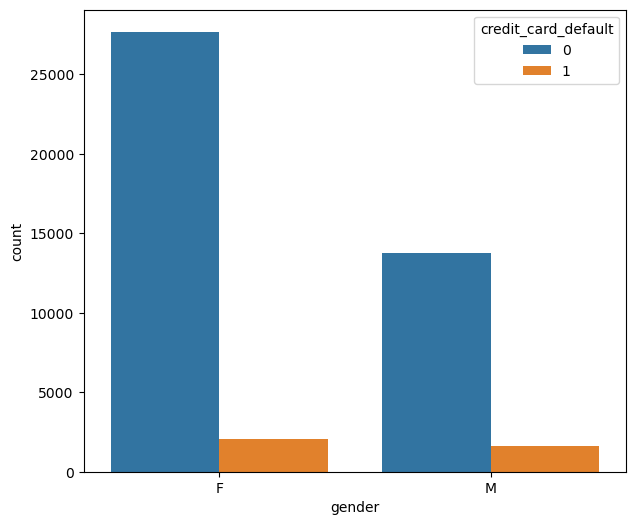

In [41]:
# male or female defaulters
plt.figure(figsize=[7,6])
sns.countplot(df['gender'], hue=df['credit_card_default'])
plt.show()

**While females make up the majority of credit card users, statistics show that the number of males who default on their credit card payments is relatively higher.**

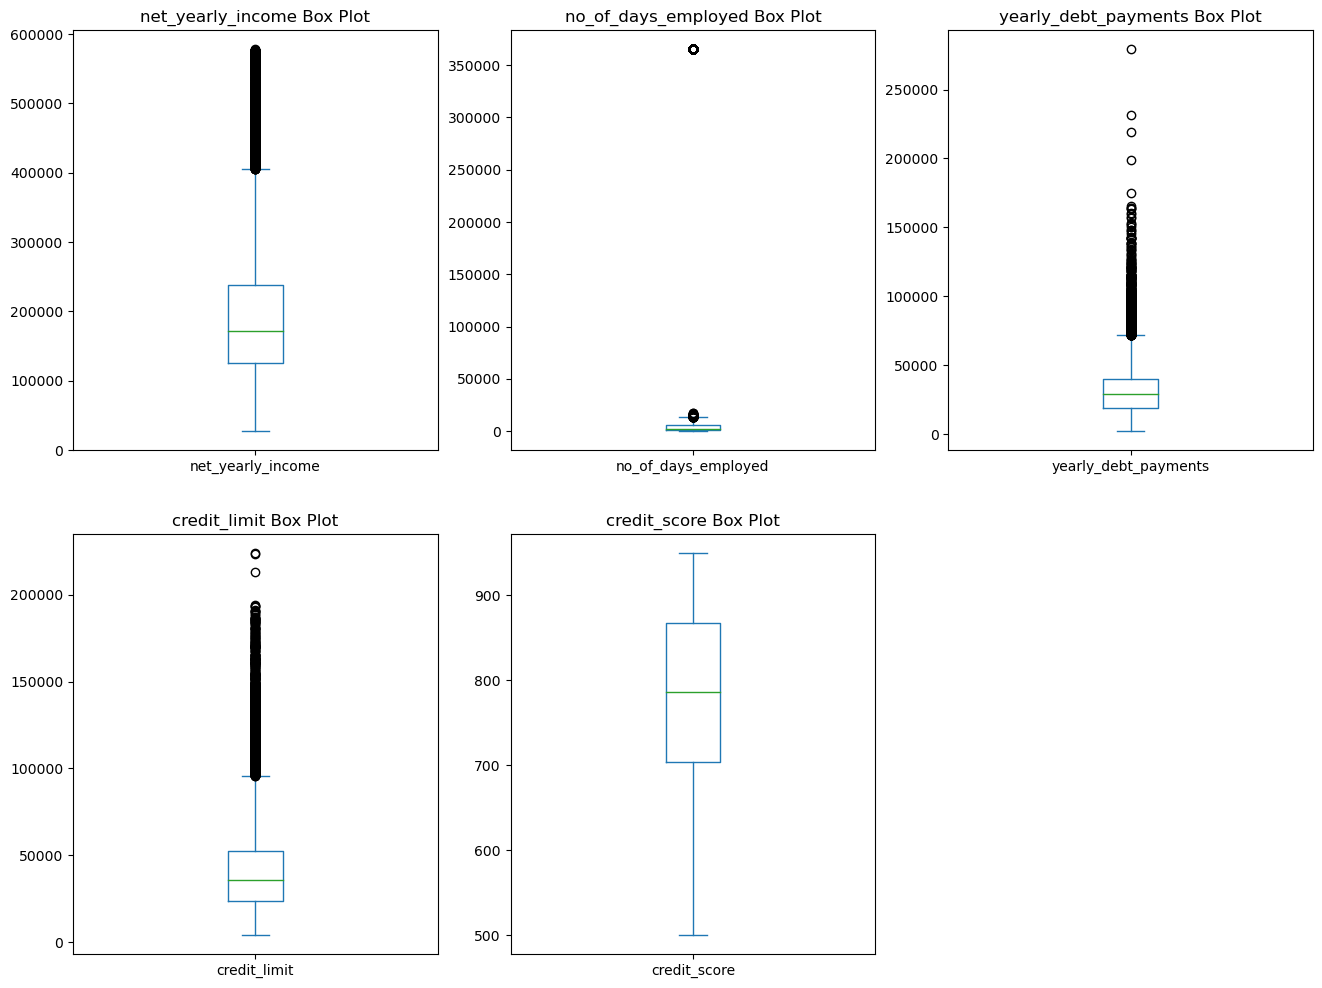

In [42]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

In [43]:
df['net_yearly_income'].quantile([0.25, 0.5, 0.75, 0.99, 0.998, 1.0])

0.250    125824.5050
0.500    170968.0300
0.750    237768.9200
0.990    494553.0015
0.998    558422.4061
1.000    577850.1200
Name: net_yearly_income, dtype: float64

In [44]:
df[df['net_yearly_income']>df['net_yearly_income'].quantile(0.998)]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,income_categories
1336,CST_144147,Leila,34,F,N,Y,1.0,576455.38,607.0,Core staff,3.0,0.0,160536.46,103710.75,18,909.0,0,0,0,High
2288,CST_124731,Baker,23,F,Y,Y,0.0,576182.88,2555.0,Medicine staff,2.0,0.0,44769.94,172739.21,3,667.0,0,0,0,High
3188,CST_127738,Sam Forgione,42,F,N,Y,0.0,560253.89,617.0,Unknown,2.0,0.0,33267.52,102291.99,61,799.0,0,0,0,High
3642,CST_109211,Dhanya Skariachan,39,F,N,Y,0.0,574861.28,365248.0,Unknown,2.0,0.0,35382.93,185726.94,86,815.0,0,0,0,High
4003,CST_117918,Antoni Slodkowski,53,F,N,N,0.0,572190.87,2820.0,Unknown,1.0,1.0,51490.55,187427.47,54,797.0,0,0,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43049,CST_130078,Caroline,34,F,Y,Y,1.0,571518.57,7003.0,Unknown,3.0,0.0,120623.69,59254.08,36,793.0,0,0,0,High
43641,CST_151413,Tsukimori,51,F,Y,Y,0.0,573405.99,6608.0,Core staff,2.0,0.0,41199.81,74282.75,26,747.0,0,0,0,High
44137,CST_156473,Clark,52,M,Y,N,0.0,575691.21,248.0,Managers,1.0,1.0,39062.36,87003.89,9,734.0,0,0,0,High
44533,CST_142776,Sarah,31,M,N,N,2.0,573360.32,386.0,Managers,4.0,1.0,32790.24,123748.64,22,699.0,0,0,0,High


In [45]:
df = df[df['net_yearly_income']<=df['net_yearly_income'].quantile(0.998)]

In [46]:
# remove outliers greater than 81.85%ile of no_of_days_employed
df = df[df['no_of_days_employed']<=df['no_of_days_employed'].quantile(0.8185)]

In [47]:
df.shape

(37421, 20)

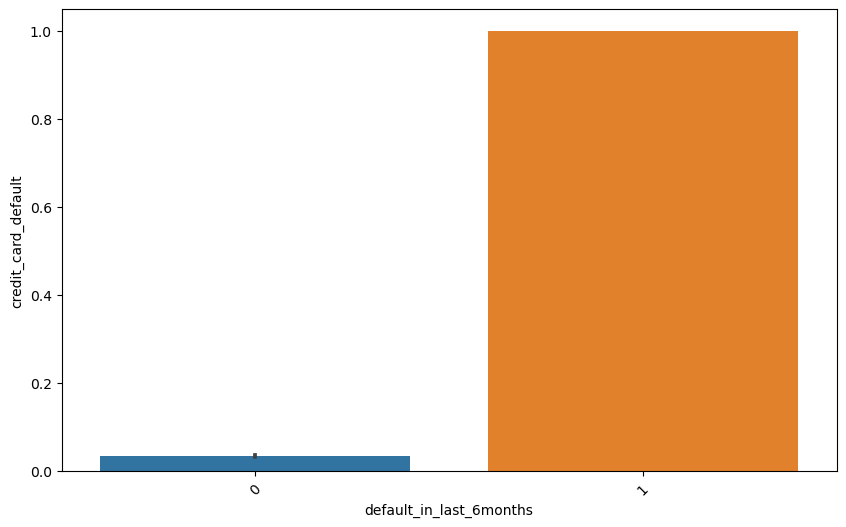

In [48]:
# Create a bar plot of credit card default by occupation type
plt.figure(figsize=[10,6])
sns.barplot(x='default_in_last_6months', y='credit_card_default', data=df)
plt.xticks(rotation=45)
plt.show()

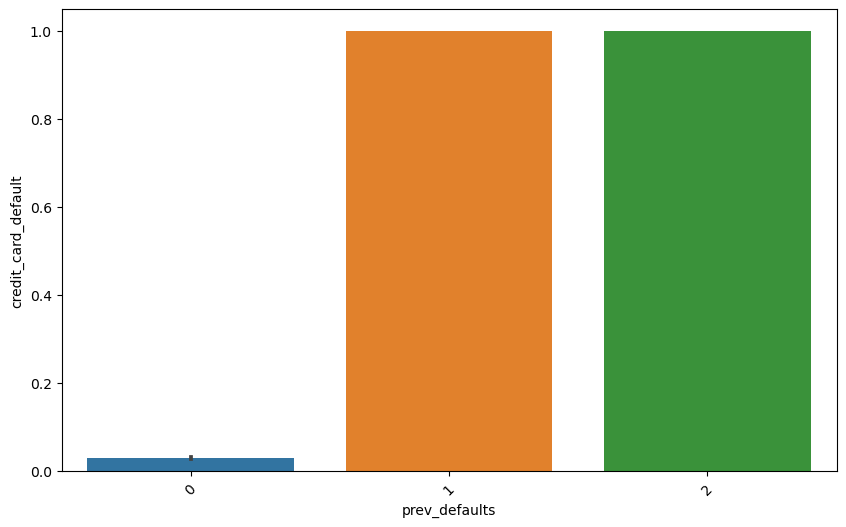

In [49]:
# Create a bar plot of credit card default by occupation type
plt.figure(figsize=[10,6])
sns.barplot(x='prev_defaults', y='credit_card_default', data=df)
plt.xticks(rotation=45)
plt.show()

**Past defaulters are more likely to default again in the future.**

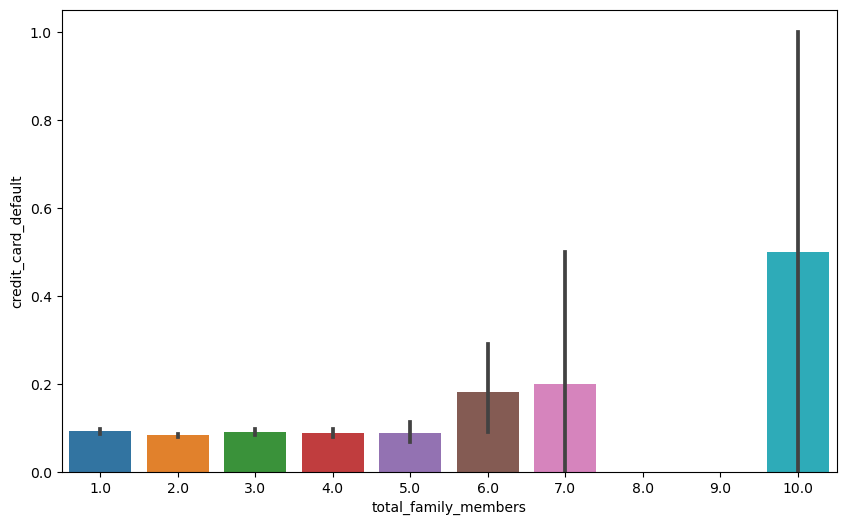

In [50]:
# Create a bar plot of the credit card default by the total family members
plt.figure(figsize=[10,6])
sns.barplot(x='total_family_members', y='credit_card_default', data=df)
plt.show()

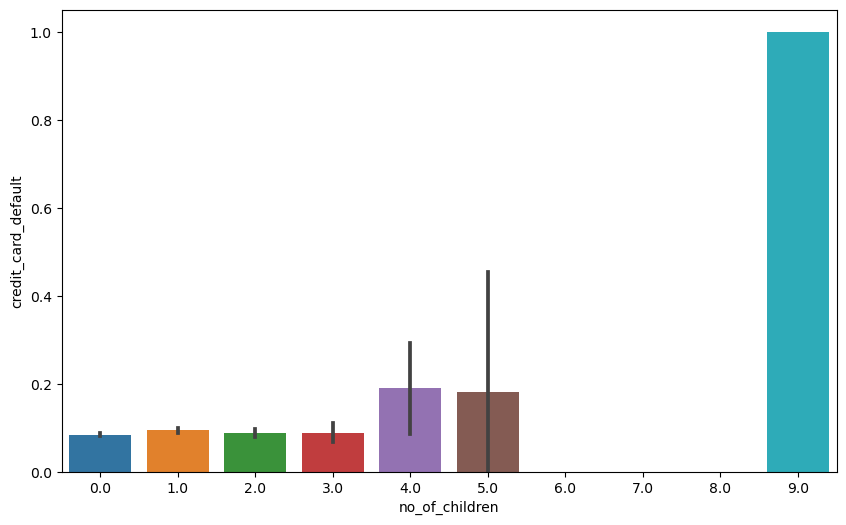

In [51]:
# Create a bar plot of the credit card default by the total family members
plt.figure(figsize=[10,6])
sns.barplot(x='no_of_children', y='credit_card_default', data=df)
plt.show()

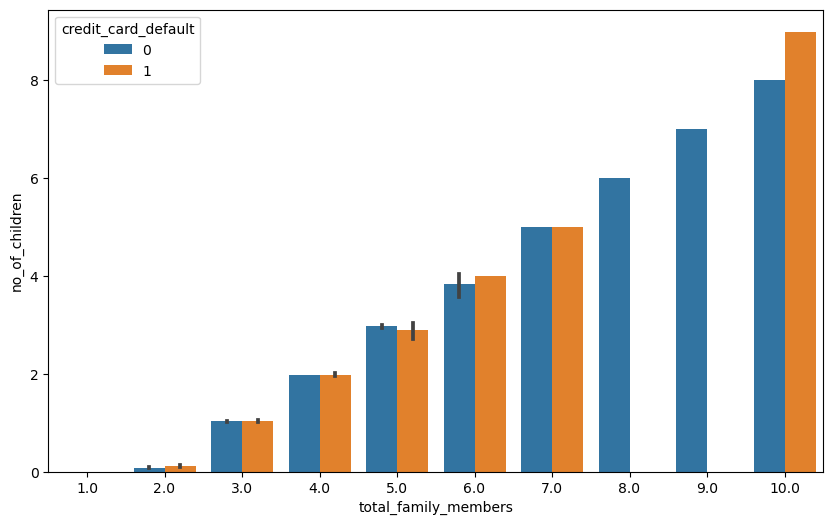

In [52]:
# Create a bar plot of the credit card default by the total family members
plt.figure(figsize=[10,6])
sns.barplot(x='total_family_members', y='no_of_children',hue = 'credit_card_default', data=df)
plt.show()

**Families with larger numbers of members and children tend to face difficulties in repaying their credit payments.**

## 7. Data Preparation:

In [53]:
# dropping text columns that aren't necessary like 'customer_id' and 'name'
df.drop(['customer_id', 'name'], axis=1, inplace=True)
df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,income_categories
0,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,Low
1,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,Low
2,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,Above Avg
3,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,Low
4,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,High


In [54]:
# Encode Categorical Column labels with value between 0 and n_classes-1

lm = LabelEncoder()

# get categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# encode labels for categorical columns
for i in cat_cols:
    df[i] = lm.fit_transform(df[i])
    
df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,income_categories
0,46,0,0,1,0.0,107934.04,612.0,17,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,3
1,29,1,0,1,0.0,109862.62,2771.0,8,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,3
2,37,1,0,1,0.0,230153.17,204.0,8,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,0
3,39,0,0,1,0.0,122325.82,11941.0,3,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,3
4,46,1,1,1,0.0,387286.00,1459.0,3,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,2


## 8. Train-Test Split:

In [55]:
# split train-test data
X = df.drop(['credit_card_default'], axis=1)
y = df['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (26194, 17) (11227, 17)
y= (26194,) (11227,)


## 9. Feature Scaling:

In [56]:
# scaling the features to standardize
scaler = MinMaxScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## 10. Data Imbalance Handling:

**Using SMOTE method, we can balance the data w.r.t. credit_card_default variable and proceed further.**

In [57]:
# initialize SMOTE method
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [58]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (47850, 17)
y_train.shape: (47850,)


,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,income_categories
0,0.37500,0.0,0.0,0.0,0.111111,0.152219,0.002467,0.000000,0.222222,1.0,0.096273,0.085426,0.545455,0.712695,0.0,0.0,1.000000
1,0.46875,1.0,0.0,1.0,0.000000,0.317429,0.002869,0.444444,0.111111,0.0,0.158336,0.156060,0.242424,0.351893,0.0,0.0,0.000000
2,0.81250,0.0,0.0,1.0,0.000000,0.322998,0.003077,0.777778,0.000000,0.0,0.140594,0.233354,0.949495,0.387528,0.0,0.0,0.000000
3,0.53125,0.0,0.0,1.0,0.000000,0.215840,0.010111,0.944444,0.111111,0.0,0.080930,0.115734,0.080808,0.407572,0.0,0.0,0.333333
4,0.50000,0.0,0.0,1.0,0.000000,0.215873,0.008400,0.444444,0.111111,0.0,0.271049,0.213307,0.151515,0.868597,0.0,0.0,0.333333


## 11. Model Training:

### 11.1 Logistic Regression

In [59]:
# initialize LogisticRegression and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [60]:
# evaluation function
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:", 100*accuracy_score(y_train, y_train_pred))
    print("F1_Score of TRAIN data:", 100*f1_score(y_train, y_train_pred, average="macro"))
    print("="*50)
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:", 100*accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)
    
    # Plot ROC_AUC Curve
    plot_roc_curve(model, X_test, y_test)
    plt.title('ROC_AUC Curve', fontsize=16)
    plt.show()

[[22709  1216]
 [  639 23286]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     23925
           1       0.95      0.97      0.96     23925

    accuracy                           0.96     47850
   macro avg       0.96      0.96      0.96     47850
weighted avg       0.96      0.96      0.96     47850

Accuracy of TRAIN data: 96.12330198537094
F1_Score of TRAIN data: 96.1227382012129
[[9793  461]
 [  39  934]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     10254
           1       0.67      0.96      0.79       973

    accuracy                           0.96     11227
   macro avg       0.83      0.96      0.88     11227
weighted avg       0.97      0.96      0.96     11227

Accuracy of TEST data: 95.54645052106528
F1_Score of TEST data: 88.19791955402579


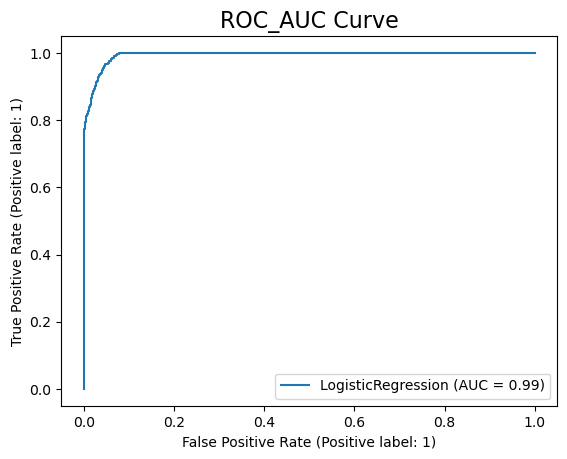

In [61]:
# prediction
evaluation(logreg)

In [67]:
# Defining all the necessary Algorithms
grid_models = [(DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],
                                           'criterion':['gini','entropy'],'random_state':[0]}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7, 8, 10], 
                                         'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
               (CatBoostClassifier(),[{'iterations': [500],'depth': [4, 5, 6],
                                       'loss_function': ['Logloss', 'CrossEntropy'],
                                       'l2_leaf_reg': np.logspace(-20, -19, 3),
                                       'eval_metric': ['Accuracy'],
                                       'leaf_estimation_iterations': [10],
                                       'logging_level':['Silent']}])]

In [68]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

DecisionTreeClassifier():
Best Accuracy : 97.86%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 98.19%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 0}

----------------

KNeighborsClassifier():
Best Accuracy : 96.46%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}

----------------

<catboost.core.CatBoostClassifier object at 0x7fb562671fa0>:
Best Accuracy : 98.09%
Best Parameters :  {'depth': 6, 'eval_metric': 'Accuracy', 'iterations': 500, 'l2_leaf_reg': 1e-19, 'leaf_estimation_iterations': 10, 'logging_level': 'Silent', 'loss_function': 'Logloss'}

----------------



### 11.2 Random Forest

In [71]:
#Fitting RandomForestClassifier Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 200, random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     10254
           1       0.84      0.86      0.85       973

    accuracy                           0.97     11227
   macro avg       0.91      0.92      0.92     11227
weighted avg       0.97      0.97      0.97     11227

ROC AUC score: 0.9951383873257492
Accuracy Score:  0.9741694130221786


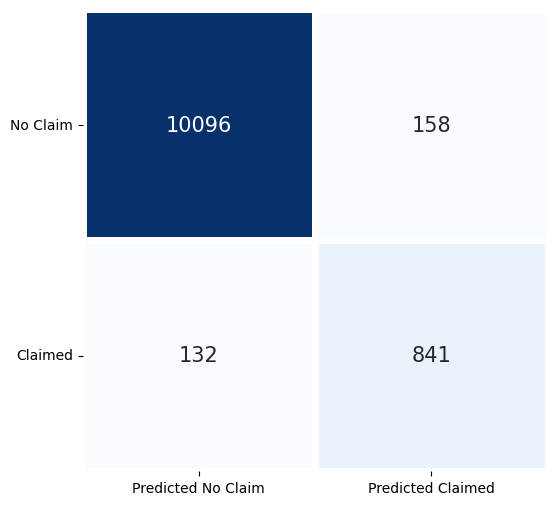

In [72]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Claim', 'Claimed'], xticklabels = ['Predicted No Claim', 'Predicted Claimed'])
plt.yticks(rotation = 0)
plt.show()

### 11.3 CatBoost

In [73]:
#Fitting CatBoostClassifier Model
classifier5 = CatBoostClassifier(depth= 6, eval_metric= 'Accuracy', iterations= 500, l2_leaf_reg= 1e-19, 
                                 logging_level= 'Silent', loss_function= 'Logloss')
classifier5.fit(X_train, y_train)
y_pred = classifier5.predict(X_test)
y_prob = classifier5.predict_proba(X_test)[:,1]
cm4 = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10254
           1       0.80      0.88      0.84       973

    accuracy                           0.97     11227
   macro avg       0.89      0.93      0.91     11227
weighted avg       0.97      0.97      0.97     11227

ROC AUC score: 0.9949598792920858
Accuracy Score:  0.9701612184911375


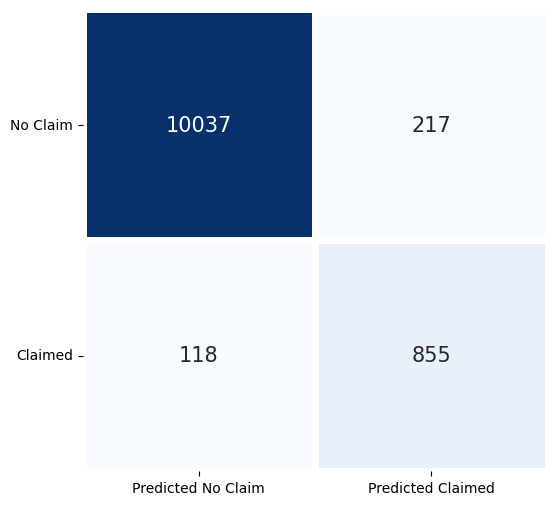

In [74]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm4, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Claim', 'Claimed'], xticklabels = ['Predicted No Claim', 'Predicted Claimed'])
plt.yticks(rotation = 0)
plt.show()

## Conclusion:

Considering the performance of different machine learning models, **CatBoost Classifier** and **Random Forest Classifier** stands out as the best options with a remarkable accuracy rate of approx. ~97%. Therefore, both can be leveraged as a **reliable predictive model** to assist American Express in **identifying high-risk customers and devising strategies to mitigate default risks.**